In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from zombies import d_zombie, zombie_human_behavior
from plotting_functions import basic_plot, behavior_plot
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt


# Basic Model

Basic model showing humans failing to stop the outbreak

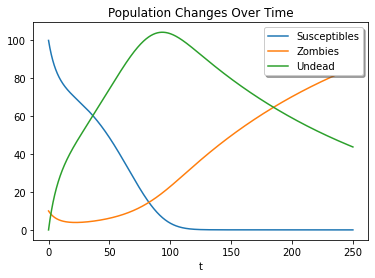

In [3]:
y_0 = np.array([100,10,0,0])

basic_params = [0.005, 0.0185, 0.0078, 0.006, 0.0001, 0.001]

solution = solve_ivp(
    d_zombie,
    (0, 250),
    y_0,
    first_step=0.05,
    max_step=0.05,
    args=basic_params
)
basic_plot(solution)

# Human Behavior Model

What happens when murdering the exposed is introduced. The outbreak is initially contained, but eventually there is a resergence

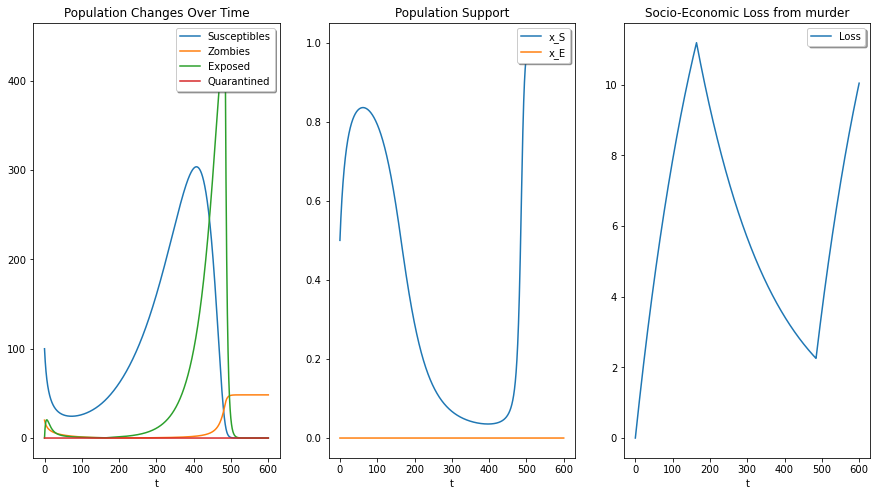

In [4]:
y_0 = [100, 20, 0, 0, 0, 0.5, 0, 0]

quarantine_params = [0, 0.2]

learning_params = [0.5, 0.0005, 0.005, .5, 0.005, 0.05]

params = basic_params + quarantine_params + learning_params
solution = solve_ivp(
    zombie_human_behavior,
    (0, 600),
    y_0,
    first_step=0.05,
    max_step=0.05,
    args=params
)

behavior_plot(solution)

Text(0.5, 1.0, 'Exposed versus Zombies for first 300 days')

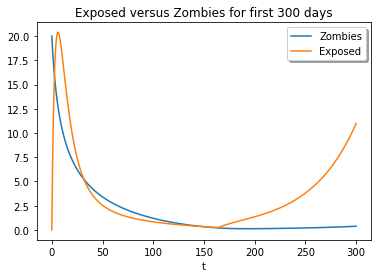

In [5]:
plt.plot(solution.t[0:300*20], solution.y.T[0:300*20,:][:,[1,2]])
plt.xlabel('t')
plt.legend(['Zombies', 'Exposed'], shadow=True, loc='upper right')
plt.title('Exposed versus Zombies for first 300 days')

# Human Behavior Model with Quarantine

What happens when there is a quarantine options as well as potential drastic measures. Humans succeed on the first implementation

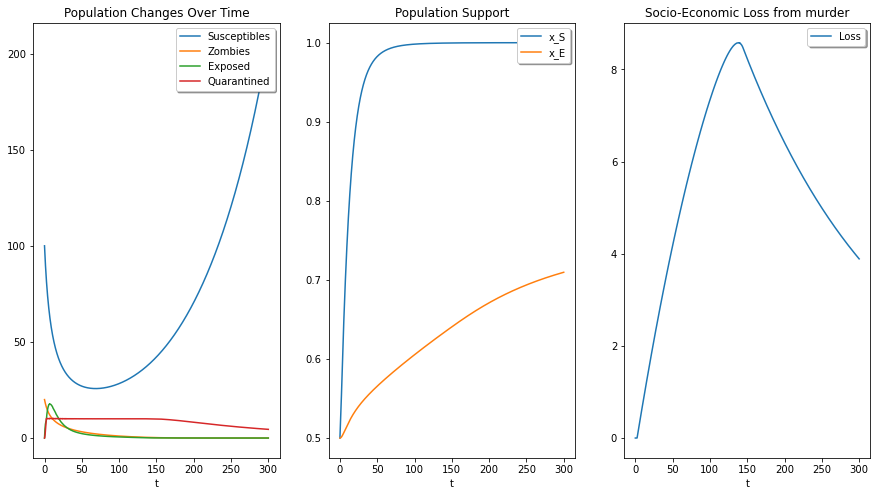

In [6]:
y_0 = np.array([100,10,0,0])

basic_params = [0.005, 0.0185, 0.0078, 0.006, 0.0001, 0.001]

# solution = solve_ivp(
#     d_zombie,
#     (0, 500),
#     y_0,
#     first_step=0.05,
#     max_step=0.05,
#     args=basic_params
# )
# basic_plot(solution)

y_0 = [100, 20, 0, 0, 0, 0.5, 0.5, 0]

quarantine_params = [10, 0.2]

learning_params = [0.5, 0.0005, 0.005, .5, 0.005, 0.05]

params = basic_params + quarantine_params + learning_params
solution = solve_ivp(
    zombie_human_behavior,
    (0, 300),
    y_0,
    first_step=0.05,
    max_step=0.05,
    args=params
)

behavior_plot(solution)